# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [58]:
# Load pickled data
import pickle

# Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train_img, y_train = train['features'], train['labels']
X_test_img, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [59]:
### Replace each question mark with the appropriate value.

# Number of training examples
n_train = len(y_train)

# Number of testing examples.
n_test = len(y_test)

# What's the shape of an traffic sign image?
image_shape = (X_train_img.shape[1], X_train_img.shape[2])

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Saved image signs/sign_38884_41.png
Saved image signs/sign_5295_3.png
Saved image signs/sign_32061_30.png
Saved image signs/sign_14643_9.png
Saved image signs/sign_389_1.png


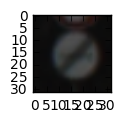

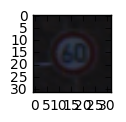

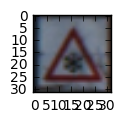

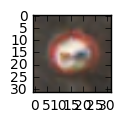

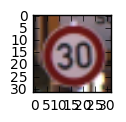

In [60]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

# Show some specified number of images and also save them to the signs directory to look at.
visualize_count = 5
visualize_list = []
for i in range(visualize_count):
    index = random.randint(0, len(X_train_rgb))
    visualize_list.append(index)
    image = X_train_img[index].squeeze()
    fname = "signs/sign_%s_%s.png" % (index, y_train[index])
    img.imsave(fname, image)
    print("Saved image %s" % (fname)) 
    
    plt.figure(figsize=(1,1))
    plt.imshow(image)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [61]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
# Convert to grayscale
def rgb_to_gray(rgb):
    gray =  np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    return np.reshape(gray, (-1, 32, 32, 1))

use_grayscale = False
# Convert to grayscale
if use_grayscale:
    X_train_img = rgb_to_gray(X_train_img)
    X_test_img = rgb_to_gray(X_test_img)

    for index in visualize_list:
        image_gray = X_train_img[index].squeeze()
        fname_gray = "signs/sign_gray_%s_%s.png" % (index, y_train[index])
        img.imsave(fname_gray, image_gray, cmap=plt.cm.gray)
        print("Original:", X_train_img[index][0][0])
        print("Grayscale:", X_train_img[index][0][0])
    
        plt.figure(figsize=(1,1))
        plt.imshow(image_gray, cmap=plt.cm.gray)
        
# Normalize by first subtracting 128 to center the color scale.
X_train_norm = np.subtract(X_train_img, 128.0)
X_test = np.subtract(X_test_img, 128.0)

# Then calculate the RGB means...
train_mean = np.mean(X_train_norm, axis=(0,1,2))
test_mean = np.mean(X_test, axis=(0,1,2))
print("train rgb_mean:",train_mean)
print("test rgb_mean:",test_mean)

# And subtract them from the train/test data to center the dataset at 0 RGB.
X_train_norm = np.subtract(X_train_norm, train_mean)
X_test = np.subtract(X_test, test_mean)

for index in visualize_list:
    image_norm = X_train_norm[index].squeeze()
    fname_norm = "signs/sign_norm_%s_%s.png" % (index, y_train[index])
    img.imsave(fname_norm, image_norm, cmap=plt.cm.gray)
    print("Original:", X_train_img[index][0][0])
    print("Normalized:", X_train_norm[index][0][0])
    


train rgb_mean: [-41.34749662 -48.51220632 -46.14514002]
test rgb_mean: [-42.08508187 -49.16755988 -46.30197717]
Original: [14 13 13]
Normalized: [-72.65250338 -66.48779368 -68.85485998]
Original: [21 20 21]
Normalized: [-65.65250338 -59.48779368 -60.85485998]
Original: [17 16 16]
Normalized: [-69.65250338 -63.48779368 -65.85485998]
Original: [75 66 61]
Normalized: [-11.65250338 -13.48779368 -20.85485998]
Original: [25 24 22]
Normalized: [-61.65250338 -55.48779368 -59.85485998]


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

Given that color is a big factor in traffic sign design and differentiation, I will be using all three color channels as part of the training input.  I preprocessed the data by subtracting 128 from every pixel value.  This centers the color scales on zero instead of 128.  Then I calculated the RGB means and subtract them from the corresponding color components.  This centers the pixel value for each color channel of this particular dataset at zero.

**Note:**

After I reached questions 6 through 8, I decided to also try using grayscale to see if the model generalizes better and using all three color channels. I've included a separate HTML file (with the grayscale postfix in the file name) that shows the running the same model with all images converted to grayscale.  Note that even though the color depth of the input data is reduced to 1 from 3, I kept all other dimensions and aspects of the model the same.  Set the use_grayscale Boolean flag in the code below to True to use grayscale data as input.

In [62]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

# Shuffle training data.
X_shuffled, y_shuffled = shuffle(X_train_norm, y_train)

# Divide randomized training data between training and validation
train_validate_ratio = 0.9
split_index = int(train_validate_ratio * n_train)

X_split = np.split(X_shuffled, [split_index, n_train])
y_split = np.split(y_shuffled, [split_index, n_train])

X_train = X_split[0]
X_validation = X_split[1]
y_train = y_split[0]
y_validation = y_split[1]

print("X_train shape", X_train.shape)
print("X_validation shape", X_validation.shape)
print("y_train shape", y_train.shape)
print("y_validation shape", y_validation.shape)


X_train shape (35288, 32, 32, 3)
X_validation shape (3921, 32, 32, 3)
y_train shape (35288,)
y_validation shape (3921,)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

To set up the training, I first shuffled the data to randomize the dataset.  Then I created the train_validate_ratio variable to represent the ratio of training data.  train_validate_ratio = 1.0 means all data is used for training, and none for validation.  train_validate_ratio = 0.9 means 90% of the data is used for training, 10% is used for validation, and so forth.  The dataset is split among training and validation data as shown by the code in the preceding code cell.

I did not generate any additional data, but the reason for doing so would be if the model will be applied to not just the training data provided here but other data, such as traffic signs that are not represented here or traffic signs from another country.  The new dataset, in addition to having new raw images, should also strive to have the brightness variety that this dataset has so that signs can be recognized in various lighting conditions.  Any new data still needs to be 32x32 in image size so that it can be trained on the same model as the existing data.  The several pixels of  border around the traffic signs in the image should also be similar to the existing data to help with scale invariance.

In [63]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

# Set up hyper parameters

EPOCHS = [100]
BATCH_SIZES = [64]
LEARNING_RATE = 0.0001
BETA = 0.01


def evaluate(X_data, y_data, batch_size):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset + batch_size], y_data[offset:offset + batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
l2_reg_strength = 1.0

# Hyperparameters
mu = 0
sigma = 0.1

# Define color depth
color_depth = 3
if use_grayscale:
    color_depth = 1

# Weights and biases
# Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x24.
# truncated_normal inputs: (height, width, input_depth, output_depth)
# height and width (5, 5, ...) are patch dimensions
l1_depth = 24
l1_weights = tf.Variable(tf.truncated_normal((5, 5, color_depth, l1_depth), mean=mu, stddev=sigma), \
    name='w1')
l1_bias = tf.Variable(tf.zeros(l1_depth), name='b1')

# Layer 2: Convolutional. Output = 10x10x72.
# truncated_normal inputs: (height, width, input_depth, output_depth)
# height and width (5, 5, ...) are patch dimensions
l2_depth = 72
l2_size = 5 * 5 * l2_depth
l2_weights = tf.Variable(tf.truncated_normal((5, 5, l1_depth, l2_depth), mean=mu, \
    stddev=sigma), name='w2')
l2_bias = tf.Variable(tf.zeros(l2_depth), name='b2')

# Layer 3: Fully Connected. Input = 5x5x72 = 1800. Output = 1000.
l3_size = 1000
l3_weights = tf.Variable(tf.truncated_normal((l2_size, l3_size), mean=mu, \
    stddev=sigma), name='w3')
l3_bias = tf.Variable(tf.zeros(l3_size), name='b3')

# Layer 4: Fully Connected. Input = 1000. Output = 500.
l4_size = 500
l4_weights = tf.Variable(tf.truncated_normal((l3_size, l4_size), mean=mu, stddev=sigma), \
    name='w4')
l4_bias = tf.Variable(tf.zeros(l4_size), name='b4')

# Layer 5: Fully Connected. Input = 500. Output = 43.
l5_size = 43
l5_weights = tf.Variable(tf.truncated_normal((l4_size, l5_size), mean=mu, stddev=sigma), \
    name='w5')
l5_bias = tf.Variable(tf.zeros(l5_size), name='b5')

def LeNetTraffic(x, keep_prob):

    # Convolutional layer 1
    l1_strides = (1, 1, 1, 1)
    l1_padding = 'VALID'
    l1_conv = tf.nn.conv2d(x, l1_weights, l1_strides, l1_padding)
    l1_biases = tf.nn.bias_add(l1_conv, l1_bias)

    # Activation.
    l1_relu = tf.nn.relu(l1_biases)

    # Pooling. Input = 28x28x24. Output = 14x14x24.
    l1_pool = tf.nn.max_pool(l1_relu, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], \
        padding='VALID')

    # Convolutional layer 2
    l2_strides = (1, 1, 1, 1)
    l2_padding = 'VALID'
    l2_conv = tf.nn.conv2d(l1_pool, l2_weights, l2_strides, l2_padding)
    l2_biases = tf.nn.bias_add(l2_conv, l2_bias)

    # Activation.
    l2_relu = tf.nn.relu(l2_biases)

    # Pooling. Input = 10x10x72. Output = 5x5x72.
    l2_pool = tf.nn.max_pool(l2_relu, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], \
        padding='VALID')

    # Flatten. Input = 5x5x72. Output = 1800.
    flat = tf.reshape(l2_pool, [-1, l2_size])

    # Layer 3: Fully Connected. Input = 1800. Output = 1000.
    l3_linear = tf.add(tf.matmul(flat, l3_weights), l3_bias)

    # Activation.
    l3_relu = tf.nn.relu(l3_linear)
    l3_drop = tf.nn.dropout(l3_relu, keep_prob)

    # Layer 4: Fully Connected. Input = 1000. Output = 500.
    l4_linear = tf.add(tf.matmul(l3_drop, l4_weights), l4_bias)

    # Activation.
    l4_relu = tf.nn.relu(l4_linear)
    l4_drop = tf.nn.dropout(l4_relu, keep_prob)

    # Layer 5: Fully Connected. Input = 500. Output = 43.
    logits = tf.add(tf.matmul(l4_drop, l5_weights), l5_bias)

    return logits

# Features and labels

x = tf.placeholder(tf.float32, (None, 32, 32, color_depth))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

# Training pipeline

keep_prob = tf.placeholder(tf.float32)
logits = LeNetTraffic(x, keep_prob)
softmax = tf.nn.softmax(logits)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy + l2_reg_strength * BETA * \
    (tf.nn.l2_loss(l3_weights) + tf.nn.l2_loss(l4_weights) + tf.nn.l2_loss(l5_weights)))
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)
training_operation = optimizer.minimize(loss_operation)

# Model evaluation

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I used the Lenet-5 architecture as is, but I increased the size of the model.  Given that color does play a role in traffic sign design, I am using the three color channels as input.  The image size is 32x32, like with the MNIST data, but the 3 color channels means three times the information, so just for redundancy I started out with 4 times the depth of the MNIST implementation at 24 at the first convolutional layer and made every layer between 3 to 4 times the size of the same layer in the MNIST network.  The sizing of the layers are well-documented in the preceding code cell, but I will repeated here also:

* data input: input 32x32x3
* layer1: convolutional output 28x28x24 using a 5x5 patch, relu activation, followed by 2x2 patch + 2x2 stride max pooling
    * output to layer 2: 14x14x24
* layer2: convolutional output 10x10x72 using a 5x5 patch, relu activation, followed by 2x2 patch + 2x2 stride max pooling
    * output to layer 3: 5x5x72 (1800 flattened)
* layer3: linear fully-connected output 1000, relu activation and drop out (keep_prob = 0.5)
* layer4: linear fully-connected output 500, relu activation and drop out (keep_prob = 0.5)
* layer5: linear fully-connected output 43, relu activation and drop out (keep_prob = 0.5)
* cross-entropy computed via softmax distance from one-hot encoding
* training loss computed with cross-entropy and l2 regularization on weights from the fully connected layers 3 through 5.

In [65]:
### Train your model here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from time import time
from matplotlib import pyplot as plt
import statistics as st
save_file = 'traffic_signs.ckpt'

#target_loss = 0.2

for batch_size in BATCH_SIZES:
    t0 = time()
    for epochs in EPOCHS:
        # Train the model
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            num_examples = len(X_train)

            print("Training...")
            print()
            epoch_train_time_list = []
            training_losses = []
            validate_accuracies = []
            for i in range(epochs):
                t1 = time()
                X_train, y_train = shuffle(X_train, y_train)
                for offset in range(0, num_examples, batch_size):
                    end = offset + batch_size
                    batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                    _, loss = sess.run((training_operation, loss_operation), \
                        feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})

                if train_validate_ratio < 1.0:
                    validation_accuracy = evaluate(X_validation, y_validation, batch_size)
                else:
                    validation_accuracy = None
                print("EPOCH {} ...".format(i+1))
                print("Training Loss = {:.3f}".format(loss))
                if validation_accuracy is not None:
                    print("Validation Accuracy = {:.3f}".format(validation_accuracy))
                    validate_accuracies.append(validation_accuracy)
                print()
                epoch_train_time_list.append(time() - t1)
                training_losses.append(loss)

            saver.save(sess, save_file)
            print("Model saved")
        print()
        print("Total training time:        {:.2f}".format(time() - t0))
        print("Mean epoch training time:   {:.2f}".format(st.mean(epoch_train_time_list)))
        print("Epoch training time stdev:  {:.2f}".format(st.pstdev(epoch_train_time_list)))
        print()
        # Evaluate the model with test data
        with tf.Session() as sess:
            saver.restore(sess, tf.train.latest_checkpoint('.'))
            test_accuracy = evaluate(X_test, y_test, batch_size)
            print("Test Accuracy = {:.3f}".format(test_accuracy))
        sess.close()        

Training...

EPOCH 1 ...
Training Loss = 146.644
Validation Accuracy = 0.318

EPOCH 2 ...
Training Loss = 98.633
Validation Accuracy = 0.124

EPOCH 3 ...
Training Loss = 91.987
Validation Accuracy = 0.079

EPOCH 4 ...
Training Loss = 90.664
Validation Accuracy = 0.073

EPOCH 5 ...
Training Loss = 88.984
Validation Accuracy = 0.071

EPOCH 6 ...
Training Loss = 87.397
Validation Accuracy = 0.064

EPOCH 7 ...
Training Loss = 85.673
Validation Accuracy = 0.066

EPOCH 8 ...
Training Loss = 82.742
Validation Accuracy = 0.067

EPOCH 9 ...
Training Loss = 79.480
Validation Accuracy = 0.073

EPOCH 10 ...
Training Loss = 75.668
Validation Accuracy = 0.078

EPOCH 11 ...
Training Loss = 71.595
Validation Accuracy = 0.093

EPOCH 12 ...
Training Loss = 66.761
Validation Accuracy = 0.105

EPOCH 13 ...
Training Loss = 61.099
Validation Accuracy = 0.110

EPOCH 14 ...
Training Loss = 54.940
Validation Accuracy = 0.128

EPOCH 15 ...
Training Loss = 48.041
Validation Accuracy = 0.142

EPOCH 16 ...
Trainin

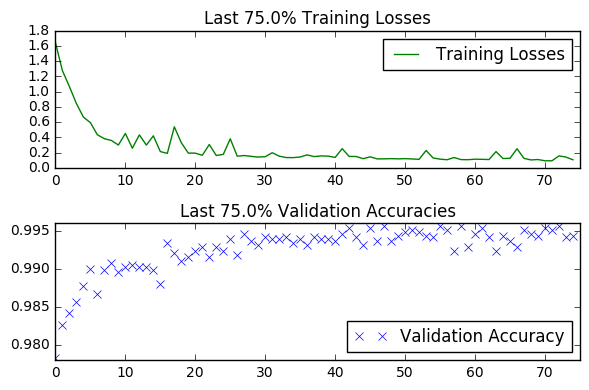

In [79]:
# Visualization of training losses
plot_count = len(training_losses)
plot_percent = 0.75
plot_start = int((1 - plot_percent) * len(training_losses))
loss_plot_data = training_losses[plot_start:plot_count]
loss_plot = plt.subplot(211)
loss_plot.set_title('Last {:.1f}% Training Losses'.format(plot_percent * 100.))
loss_plot.plot(loss_plot_data, 'g', label='Training Losses')
loss_plot.set_xlim([0, len(loss_plot_data)])
loss_plot.legend(loc=1)
if len(validate_accuracies) > 0:
    acc_plot_data = validate_accuracies[plot_start:plot_count]
    acc_plot = plt.subplot(212)
    acc_plot.set_title('Last {:.1f}% Validation Accuracies'.format(plot_percent * 100))
    acc_plot.plot(acc_plot_data, 'x' , label='Validation Accuracy')
    #acc_plot.set_ylim([0, 1.0])
    acc_plot.set_xlim([0, len(acc_plot_data)])
    acc_plot.legend(loc=4)
plt.tight_layout()
plt.show()            


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I tried out different learning rate first and a low learning rate of 0.0005 or 0.0001 seems to work best in keeping training loss and validation accuracy moving in the right direction.

I introduced looping over batch sizes and epochs so that I can run various permutations of these in one go (the two for loops before running the TensorFlow sessions).  A batch size of 64 seems to produce the quickest convergence of validation accuracy.  The initial mu and sigma values seems to work well enough in keeping the prediction fairly uncertain to start so I didn't touch them.  I tuned the various hyper-parameters until I was getting around 99% validation accuracy within 80 to 100 epochs, but testing accuracy remained stubbornly around 91% only.  This is a clear indication of some overfitting.  

To address this overfitting, I first introduced dropout with keep_prob = 0.5 in the three fully-connected layers (3 through 5) to reduce overfitting, but I didn't notice a significant difference in testing accuracy with this dataset.  

Running with too many epochs could also worsen overfitting, and I kept early termination in mind.  With my model, while validation accuracy gets pretty good at 50 epochs, there's a 1.5% mean testing accuracy improvement at 100 epochs (95.6% versus 94.1%, with L2 regularization) which is why I ended there.  Also, going beyond 100 epochs, even way beyond, didn't seem to improve testing accuracy any further.

Then I introduced L2 regularization, also just to the fully connected layer.  I wasn't sure if L2 regularization applied to convolutional layers and couldn't find a good answer via Google, but applying it to just the fully connected layer made a substantial difference in testing accuracy, which increased to around 96%. I did try to include L2 regularization in the convolution layers but performance was slightly worse, so I just kept the regularization on the fully connected layers.  Note that I intend to use the l2_reg_strength variable as on/off flag for using L2 regularization (i.e. its value is 1.0 or 0.0), while using the BETA hyper-variable as the regularization scaling value, so that once I found a good BETA value I can leave it unchanged while turning regularization on or off.

I kept the AdamOptimizer from the MNIST implementation and read up on it.  Apparently it includes momentum and RMSProp to keep the gradient descent moving in the right direction and works reasonably well on this dataset.  I kept the same accuracy evaluation from the MNIST lab also.  This comparision approach also applies here since the model outputs are the same format.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I would say that having a Lenet-5 architecture to start with helps a lot.  Given that this is an image classification problem on 32x32 image like with MNIST and abundant hints that this would be a good baseline, I started with the MNIST Lenet-5 architecture.  With the additional information from 3 color channels I just needed to make sure to expand the network so that there's sufficient weights to represent the additional information by starting with 24 depth instead of 6 (4x increase) at the first convolutional layer and kept a similar 3-4x increase in parameter count at each subsequent layer.  Most of the work was playing around with hyperparameters to get validation accuracy to improve/training loss to reduce at a good clip.  The one major addition was L2 regularization to address the slight overfitting that improved testing accuracy from 91% to around 96%.  Dropout was also included but seems to have made much less a difference in this case than L2 regularization.

While not shown in this notebook, I worked mostly in separate python scripts that allow for better debugging, and I wrote some code to log the result of each run so that I have a history of what hyper-parameter combination or model features produced what result as I tried different things.  Once I have a working model I copied the essential code back into the notebook.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Image shape (10, 32, 32, 3)
image 1 shape (1, 32, 32, 3)
image 2 shape (1, 32, 32, 3)
image 3 shape (1, 32, 32, 3)
image 4 shape (1, 32, 32, 3)
image 5 shape (1, 32, 32, 3)
image 6 shape (1, 32, 32, 3)
image 7 shape (1, 32, 32, 3)
image 8 shape (1, 32, 32, 3)
image 9 shape (1, 32, 32, 3)
image 10 shape (1, 32, 32, 3)
The extra data shape is: (10, 32, 32, 3)
Extra softmax max index: [2 2 2 2 2 2 2 2 2 2]
Extra image test accuracy = 0.100


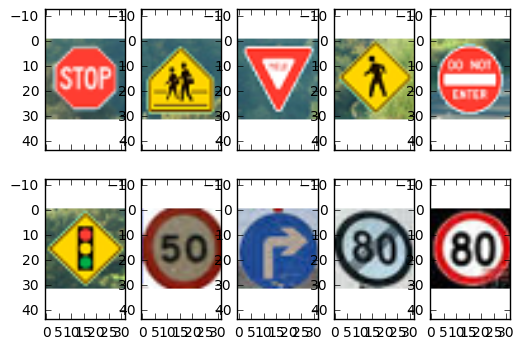

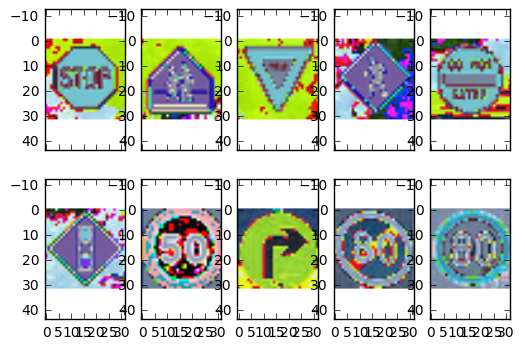

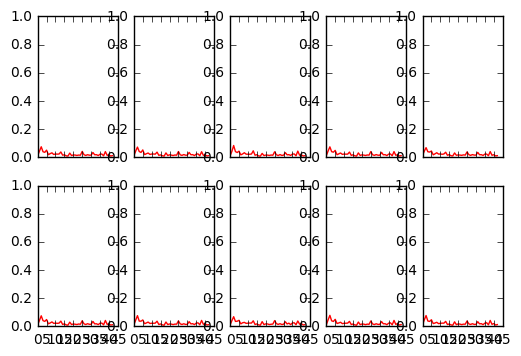

In [193]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from matplotlib import image as mpimg
from math import ceil

def plot_images(X, rows, c_map):
    img_count = len(X)
    plot_cols = int(ceil(img_count / rows))
    f, img_plots = plt.subplots(rows, plot_cols, sharex=True)

    index = 0
    for r in range(rows):
        for c in range(plot_cols):
            img_plots[r, c].imshow(X[index].squeeze(), cmap=c_map)
            index += 1
            if index >= len(X):
                break

def plot_probabilities(X, rows, color):
    plot_cols = ceil(len(X) / rows)
    f, softmax_plots = plt.subplots(rows, plot_cols, sharex=True)
    index = 0
    for r in range(rows):
        for c in range(plot_cols):
            softmax_plots[r, c].plot(X[index], color)
            softmax_plots[r, c].set_ylim([0.0, 1.0])
            index += 1
            if index >= len(X):
                break
    plt.show()    

print("Image shape", X_extra.shape)
for i in range(1, img_count + 1):
    fname = 'sign{:02d}.png'.format(i)
    img = mpimg.imread(fname)
    
    img = np.expand_dims(img, axis=0)
    print("image %s shape" % (i), img.shape)
    if i == 1:
        X_extra = img
    else:
        X_extra = np.append(X_extra, img, axis=0)
        
# grayscale
c_map = 'viridis'

row_count = 2
plot_images(X_extra, row_count, c_map)

if use_grayscale:
    X_extra = rgb_to_gray(X_extra)
    c_map = plt.cm.gray    
    
# normalize
X_extra = np.subtract(X_extra, 128.0)
extra_mean = np.mean(X_extra, axis=(0,1,2))
X_extra = np.subtract(X_extra, extra_mean)

row_count = 2
plot_images(X_extra, row_count, c_map)

#printing out some stats and plotting
print('The extra data shape is:', X_extra.shape)

# labels
y_extra = [14, 28, 13, 27, 17, 26, 2, 33, 5, 5]

saver = tf.train.Saver()

save_file = 'traffic_signs.ckpt'

def evaluate_extra(X_data, y_data, batch_size):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset + batch_size], y_data[offset:offset + batch_size]
        softmax_out = sess.run(softmax, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        # print ("Extra softmax:", softmax_out)
        print ("Extra softmax max index:", np.argmax(softmax_out, axis=1))
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return (total_accuracy / num_examples, softmax_out)

# Evaluate the model with test data
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    (test_accuracy, softmax_prob) = evaluate_extra(X_extra, y_extra, len(y_extra))
    print("Extra image test accuracy = {:.3f}".format(test_accuracy))

    row_count = 2
    plot_probabilities(softmax_prob, row_count, 'r')
    

**Note**: 
    
The above are plots of 10 images (original and normalized) that I collected from the web.  The first six are American signs that I pulled out of the web and superimposed over a road scene with trees and roads in the background.  When I saw that the model failed badly to recognized these, I added four German road signs that have representation in the training data. Unfortunately, the recognition of these four signs are also poor...  The softmax plots for these images shows that no single softmax probability reach 0.1 for any of the images.  I am not sure why this is the case.  One possibility is less of a border around the signs in these images which could have made them looked fundamentally different from the model, though Lenet-5 is supposed to have good scale-invariance.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I selected the five images 100 through 104 from the test data at first.  These images are fairly diverse, with two speed limits, 30 and 80 (labels 1 & 5), that could easily be mixed up, no passing for trucks (label 10), right of way at next intersection (label 11), and turn right ahead (label 33).  The classifier did a perfect job of classifying them with the maximum softmax probability of 1.0 for three of the images (labels 1, 10, and 33).  Label 11's probability is also virtually 1.0 at 0.99987.  Label 5's probability was the lowest at 0.97877, still pretty certain.  The visualization of all 20 of these images and their softmax probabilities is just before question 7, below.

These images all have similarities with others in the dataset that make them hard to distinguish.  There are many signs with a circular or triangle shape in the dataset, for example.  Perhaps the right turn indication with its distinctively curved arrow is easier to discern among other signs.  However, I am impressed that the 30 km/h and 80 km/h signs are well distinguished from each other.

After seeing how well the images were predicted, I expanded the list to twenty images just to see if I can find an image where there is some uncertainty or mistake in the subsequent code cell.  See the plots right before question 7 for the softmax probabilities visualization. Image index 114 was the only one out of the 20 that was incorrectly classified.  See more discussion of this classification error in my answer 8 below.

Selected Labels: [1, 10, 5, 11, 33, 4, 35, 25, 33, 4, 1, 14, 16, 10, 30, 3, 27, 29, 1, 17]
image 0 shape (1, 32, 32, 3)
image 1 shape (1, 32, 32, 3)
image 2 shape (1, 32, 32, 3)
image 3 shape (1, 32, 32, 3)
image 4 shape (1, 32, 32, 3)
image 5 shape (1, 32, 32, 3)
image 6 shape (1, 32, 32, 3)
image 7 shape (1, 32, 32, 3)
image 8 shape (1, 32, 32, 3)
image 9 shape (1, 32, 32, 3)
image 10 shape (1, 32, 32, 3)
image 11 shape (1, 32, 32, 3)
image 12 shape (1, 32, 32, 3)
image 13 shape (1, 32, 32, 3)
image 14 shape (1, 32, 32, 3)
image 15 shape (1, 32, 32, 3)
image 16 shape (1, 32, 32, 3)
image 17 shape (1, 32, 32, 3)
image 18 shape (1, 32, 32, 3)
image 19 shape (1, 32, 32, 3)
Extra softmax max index: [ 1 10  5 11 33  4 35 25 33  4  1 14 16 10 20  3 27 29  1 17]
Extra image test accuracy = 0.950


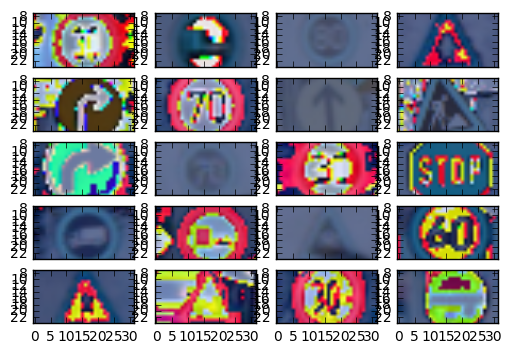

In [194]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
# Show some specified number of images and also save them to the signs directory to look at.
select_list = range(100, 120)
y_select = [i for i in y_test[select_list]]
print("Selected Labels:", y_select)
X_select = X_test[select_list[0]]
X_select = np.expand_dims(X_select, axis=0)

for i in range(0, len(select_list)):
    index = select_list[i]
    image = X_test[index].squeeze()

    image = np.expand_dims(image, axis=0)
    print("image %s shape" % (i), image.shape)
    if i == 0:
        X_select = image
    else:
        X_select = np.append(X_select, image, axis=0)
    
# Evaluate the model with selected images
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    (select_accuracy, softmax_prob_test) = evaluate_extra(X_select, y_select, len(y_select))
    print("Extra image test accuracy = {:.3f}".format(select_accuracy))

plot_images(X_select, 5, c_map)

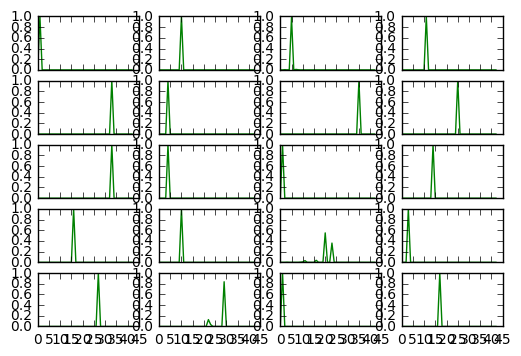

In [195]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
row_count = 5
plot_probabilities(softmax_prob_test, row_count, 'g')

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


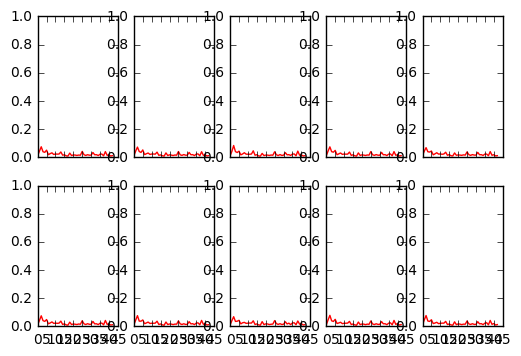

In [198]:
    row_count = 2
    plot_probabilities(softmax_prob, row_count, 'r')

**Answer:**

I reproduced the softmax probability plots for the 10 new images that I captured above.  The model did not correctly classified any of my captured images.  The one correct classification I will treat as a fluke, since it was very uncertain with all 10 captured images, with no softmax probability above 0.1.  

I actually went back and tried to run the classification in grayscale to see if it would generalize better to the captured images.  The results of this is in the addition HTML page that I generated with the grayscale postfix in the file name.

Contrast the probability plots of these 20 images in the original test set (the above green plots) with the softmax probability plots for the 10 images that I created by hand from outside of the supplied dataset.  What's clearly obvious is that this is supervised learning and this simple model with the limited data around 43 German traffic signs is not be robust to data captured in a different way by a different collector.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

See the plots above question 8 for a visualization of the softmax probabilities for the 20 selected test images.  Of these 20, the model was quite certain on all of them and was correct on 19 out of 20 (par for the overall 96% test accuracy).  The one mistake that it made was to classify beware of ice and snow (label 30) as dangerous curve to the right (label 20).  Given that image 114 is a low light version where the content inside the triangle frame was blurred litterally beyond image recognition (fourth row, third cell in the image visualization above), it could easily be mistaken for another sign with a triangle shape.

The code block below shows the top 5 labels for classifying image 114. Note that the correct label was not in the top 5 output for this particular image.

In [199]:
top_5 = tf.nn.top_k(tf.constant(softmax_prob_test), k=5)
with tf.Session() as sess2:
    output = sess2.run(top_5)
    formattedList = ["%.3f" % member for member in output[0][14]]
    print("Top K Probabilities for 114:", formattedList)
    print("Top K Labels for 114:       ", output[1][14])

Top K Probabilities for 114: ['0.550', '0.360', '0.038', '0.031', '0.008']
Top K Labels for 114:        [20 23 16 11 10]


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.